<a href="https://colab.research.google.com/github/sgascoin/notebooks/blob/main/RandomSamplingUsingQuantile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import stats

# Quantile robustness

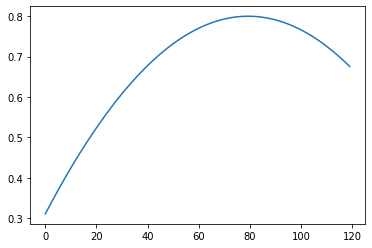

In [2]:
x=numpy.linspace(-0.5,0.25,120)
y=numpy.cos(x)*4-3.2;
plt.plot(y);

The truth

In [3]:
trueQuantile=numpy.quantile(y,0.75)
trueQuantile

0.7817330982636247

In [4]:
N=10000;
maxObservation=10;

fullRand=numpy.zeros((N,maxObservation));
fullRandRight=numpy.zeros((N,maxObservation));

for n in range(N):
    randPoint=numpy.random.permutation(y)
    for j in range(maxObservation):
      fullRand[n,j]=numpy.quantile(randPoint[:(j+1)],0.75)
      fullRandRight[n,j]=numpy.quantile(randPoint[:(j+1)],0.75,interpolation="nearest")
      


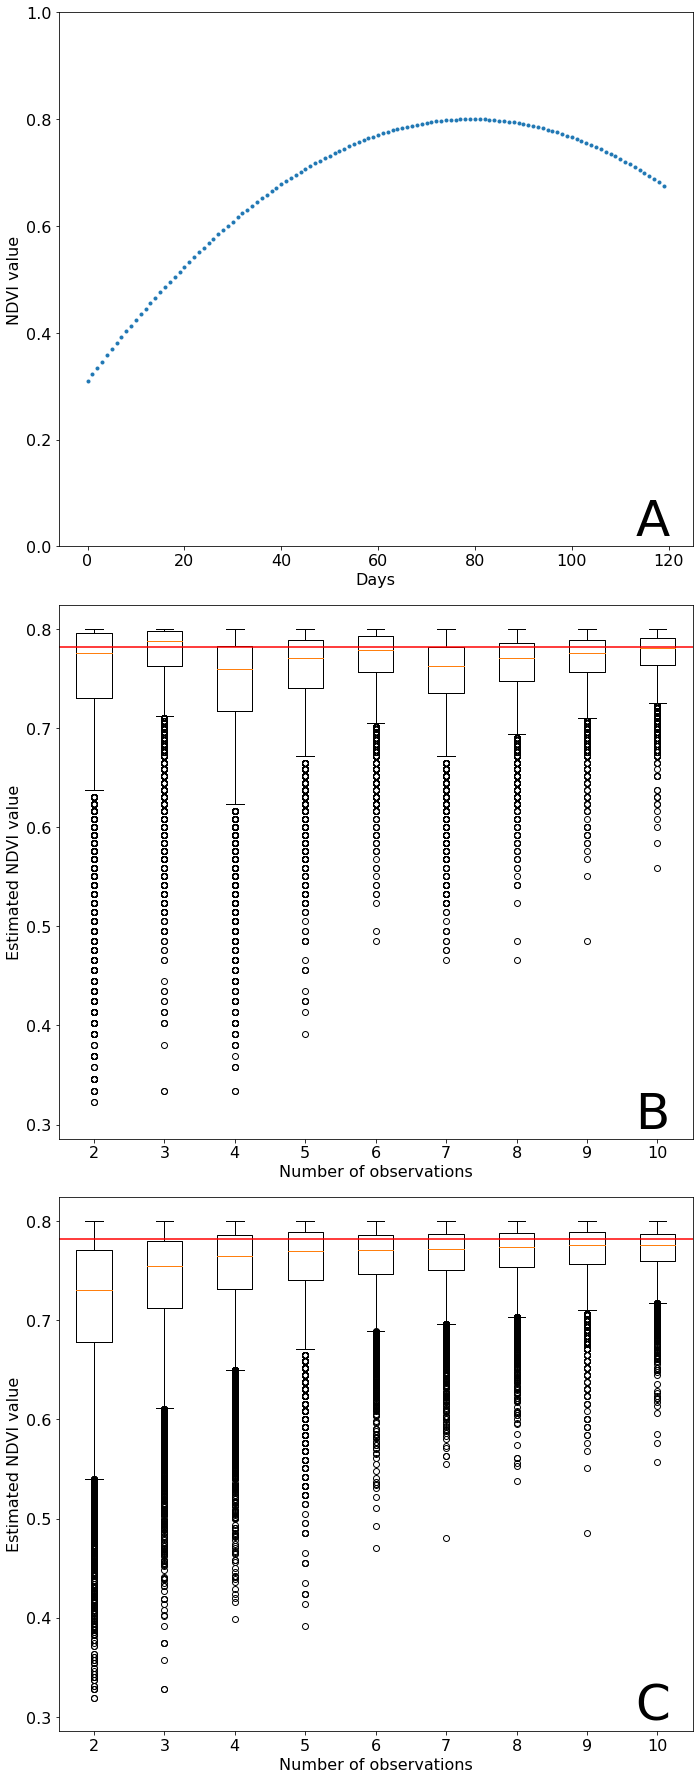

In [5]:
def get_axis_limits(ax, xScale=.91,yScale=.02):
    return ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*xScale, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*yScale
plt.rcParams['font.size'] = '16'

fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,25))
ax0.plot(y,'.')

ax0.set_ylabel("NDVI value")
ax0.set_xlabel("Days")
ax0.set_ylim(0,1)
ax0.annotate('A', xy=get_axis_limits(ax0),fontsize=50)

ax1.boxplot(fullRandRight)
ax1.plot([0.75,12.25],[trueQuantile,trueQuantile],color='r',label='true 0.75 quantile')

ax1.set_ylabel("Estimated NDVI value")
ax1.set_xlabel("Number of observations")
ax1.set_xlim(1.5,10.5)
ax1.annotate('B', xy=get_axis_limits(ax1),fontsize=50)

ax2.boxplot(fullRand)
ax2.plot([0.75,12.25],[trueQuantile,trueQuantile],color='r',label='true 0.75 quantile')

ax2.set_ylabel("Estimated NDVI value")
ax2.set_xlabel("Number of observations")

ax2.set_xlim(1.5,10.5)
ax2.annotate('C', xy=get_axis_limits(ax2),fontsize=50)

fig.tight_layout()
plt.show()

# What about the mean ?

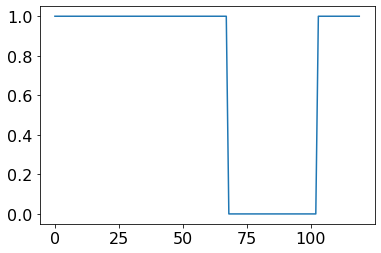

In [15]:
x=numpy.linspace(-0.5,0.2,120)
y=abs(x)>0.10
plt.plot(y);

In [30]:
trueAvereage=numpy.mean(y,)
trueAvereage

0.7083333333333334

In [31]:
N=10000;
maxObservation=10;

fullRand=numpy.zeros((N,maxObservation));

for n in range(N):
    randPoint=numpy.random.permutation(y)
    for j in range(maxObservation):
      fullRand[n,j]=numpy.mean(randPoint[:(j+1)])

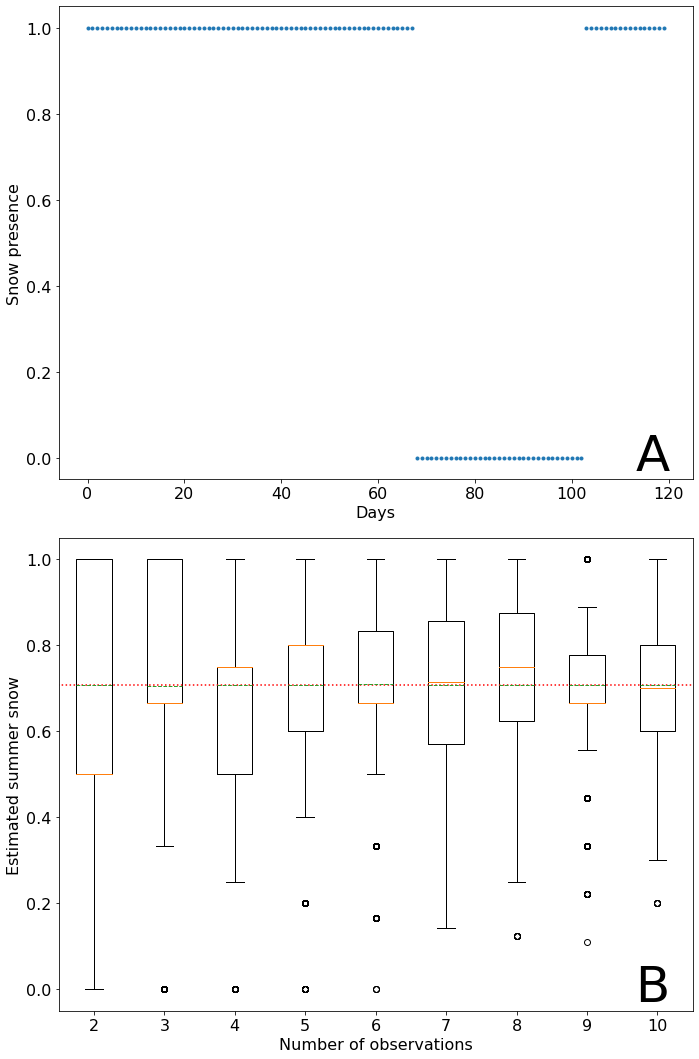

In [36]:
plt.rcParams['font.size'] = '16'

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,15))
ax0.plot(y,'.')

ax0.set_ylabel("Snow presence")
ax0.set_xlabel("Days")
ax0.annotate('A', xy=get_axis_limits(ax0),fontsize=50)

ax1.boxplot(fullRand, meanline=True, showmeans=True)
ax1.plot([0.75,12.25],[trueAvereage,trueAvereage],color='r',linestyle='dotted',label='true average ')

ax1.set_ylabel("Estimated summer snow")
ax1.set_xlabel("Number of observations")

ax1.set_xlim(1.5,10.5)
ax1.annotate('B', xy=get_axis_limits(ax1),fontsize=50)


fig.tight_layout()
plt.show()

# What about the *min* ("Year-round snow") ?

In [41]:
trueMin=int(numpy.min(y,))
trueMin

0

In [42]:
N=10000;
maxObservation=10;

fullRand=numpy.zeros((N,maxObservation));

for n in range(N):
    randPoint=numpy.random.permutation(y)
    for j in range(maxObservation):
      fullRand[n,j]=numpy.min(randPoint[:(j+1)])

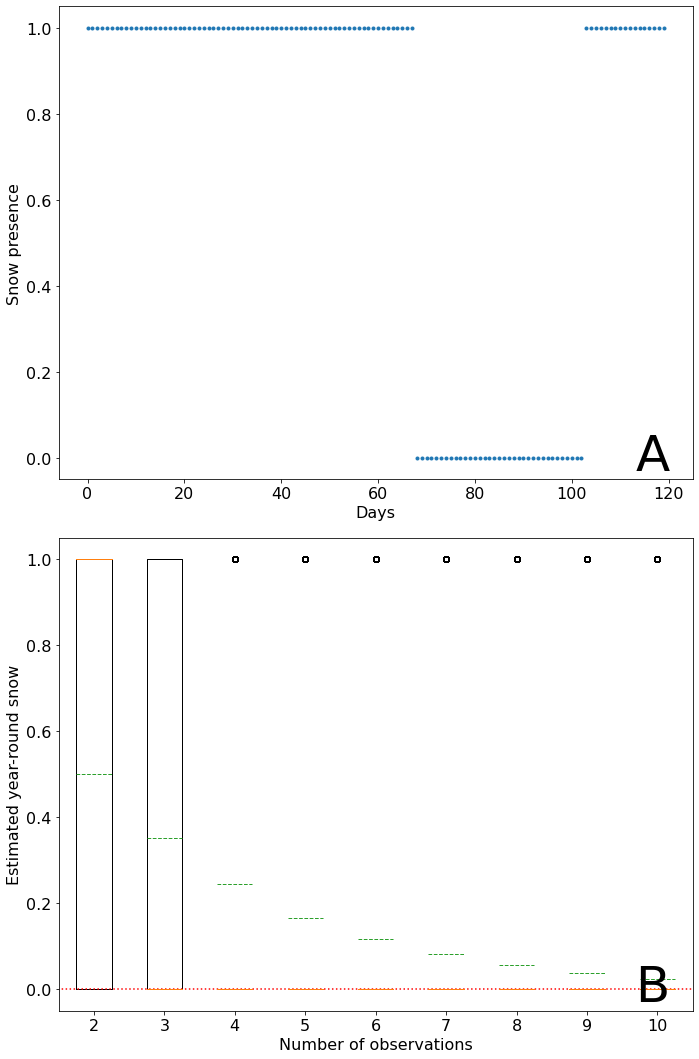

In [44]:
plt.rcParams['font.size'] = '16'

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,15))
ax0.plot(y,'.')

ax0.set_ylabel("Snow presence")
ax0.set_xlabel("Days")
ax0.annotate('A', xy=get_axis_limits(ax0),fontsize=50)

ax1.boxplot(fullRand, meanline=True, showmeans=True)
ax1.plot([0.75,12.25],[trueMin,trueMin],color='r',linestyle='dotted',label='true average ')

ax1.set_ylabel("Estimated year-round snow")
ax1.set_xlabel("Number of observations")

ax1.set_xlim(1.5,10.5)
ax1.annotate('B', xy=get_axis_limits(ax1),fontsize=50)


fig.tight_layout()
plt.show()